In [1]:
class Wall:
    def __init__(self, start, end, is_vertical, face):
        self.is_removed = False
        self.start = start
        self.end = end
        self.is_vertical = is_vertical
        self.face = face
    def __str__(self) -> str:
        return str(self.start) + "->" + str(self.end)
    def __repr__(self) -> str:
        # return str(self.start) + "->" + str(self.end)
        return '['+str(self.is_removed).lower() + ", " + str(self.face)+']'
class Cell:
    def __init__(self, position, walls, is_visited, is_obstacle, face_index = 0):
        
        self.up_wall = walls[0]
        self.right_wall = walls[1]
        self.bottom_wall = walls[2]
        self.left_wall = walls[3]

        self.up_cell = None
        self.right_cell = None
        self.bottom_cell = None
        self.left_cell = None

        self.is_visited = is_visited
        self.is_obstacle = is_obstacle
        self.position = position
        self.face_index = face_index
    def get_direction(self, direction):
        if direction == "up":
            return self.up_wall, self.up_cell
        if direction == "right":
            return self.right_wall, self.right_cell
        if direction == "bottom":
            return self.bottom_wall, self.bottom_cell
        if direction == "left":
            return self.left_wall, self.left_cell

        

In [2]:


width = 9
height = 9
depth = 9
def generate_walls(offset_row= 0, offset_col= 0, width = width, height = height, face = 0 ):
    walls = [[None] * (width+1 if i % 2 == 1 else width) for i in range(2 * height+1)]
    vertical = False
    for i in range(2 * height+1):
        row = i//2 + offset_row  
        for j in range(width + 1 if vertical else width):
            col = j + offset_col
            wall = Wall((row,col), (row+1, col) if vertical else (row, col+1), vertical, face) 
            walls[i][j] = wall
        vertical = not vertical
    return walls

def generate_cells(walls, width = width, height = height, face_index = 0):
    cells = [[0] * (width) for i in range(height)]
    for i in range(height):
        for j in range(width):
            up_wall = walls[i*2][j]
            right_wall = walls[i*2+1][j+1]
            down_wall = walls[i*2+2][j]
            left_wall = walls[i*2+1][j]

            cell = Cell((i, j), (up_wall, right_wall, down_wall, left_wall), False, False, face_index=face_index)
            cells[i][j] = cell 
    for i in range(height):
        for j in range(width):
            cells[i][j].up_cell = cells[i-1][j] if i > 0 else None
            cells[i][j].right_cell = cells[i][j+1] if j < width - 1 else None
            cells[i][j].bottom_cell = cells[i+1][j] if i < height - 1 else None
            cells[i][j].left_cell = cells[i][j-1] if j > 0 else None
    return cells
walls = generate_walls()
cells = generate_cells(walls)

In [3]:
import random
import sys
directions = ["up", "right", "bottom", "left"]
print
seed = random.randrange(sys.maxsize)
# seed = 4371092068570916859
# seed = 8232124659646686844
random.seed(seed)
print("Seed was:", seed)

startRow, startCol = random.randint(0, height-1), random.randint(0, width-1)
print(startRow)
print(startCol)
def dfs(cell):
    
    cell.is_visited = True
    # print(directions)
    # print(cell.position)
    shuffled_directions = list(directions)
    random.shuffle(shuffled_directions)
    for direction in shuffled_directions:
        wall, next_cell = cell.get_direction(direction)
        # if next_cell: print(next_cell.position)
        if next_cell and not next_cell.is_visited:

            dfs(next_cell)
            wall.is_removed = True

dfs(cells[startRow][startCol])

Seed was: 4054811037228583204
3
7


In [4]:

vertical = False
for i in range(2*height+1):
    if not vertical:
        for j in range(width):
            print("--", end = "")
            if walls[i][j].is_removed:
                print ("  ", end = "")
            else:
                print("--", end = "")
        print("--", end = "")
    else:
        for j in range(width):
            if walls[i][j].is_removed:
                print ("  ", end = "")
            else:
                print("--", end = "")
            print("  ", end = "")
        if walls[i][j+1].is_removed:
            print("  ", end = "")
        else: print("--", end = "")
    vertical = not vertical
    print()

--------------------------------------
--                                  --
--  ----------------------------------
--      --                          --
--  --  --  ----------------------  --
--  --  --      --          --      --
--  --  ------  --  ------  --  ------
--  --          --      --  --  --  --
--  --------------  --  --  ------  --
--  --          --  --  --      --  --
--  --  ------  ------  ------  --  --
--      --      --      --  --  --  --
----------  ------  ------  --  --  --
--      --          --      --  --  --
--  ------------------  --  --  --  --
--      --          --  --  --  --  --
--  --  --  ------  --  --  --  --  --
--  --          --      --          --
--------------------------------------


In [5]:
import matplotlib.pyplot as plt 
def draw_maze(walls):
    fig, ax = plt.subplots()
    for row in walls:
        for wall in row:
            if not wall: continue
            if wall.is_removed: continue
            start = wall.start
            end = wall.end
            ax.plot([start[1], end[1]], [height - start[0], height- end[0]], color='black')
    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

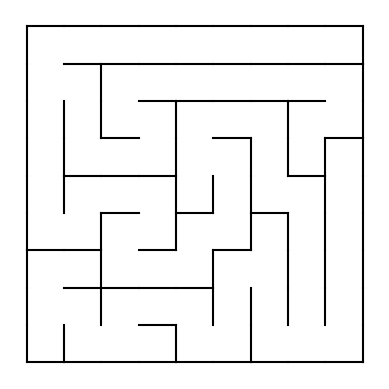

In [6]:
draw_maze(walls)

In [7]:

sideWalls = [0] * 6
sizes = [(width, height), (height, depth), (width, depth), (height, depth),(width, height), (width, depth) ]
side_offsets = ((0,0), (height, -height), (height,0), (height,width), (depth+height,0), (depth+height+ height,0))
for i, offset in enumerate(side_offsets):
    size = sizes[i]
    offset_row = offset[0]
    offset_col = offset[1]
    walls = generate_walls(offset_row, offset_col, width=size[0], height = size[1], face = i)
    sideWalls[i] = walls

# first row of a will become last row of b
def combine_horizontal_walls(a, b):
    for wall in a[0]:
        wall.is_duplicate = True
    a[0] = list(b[-1])

# def combine_vertical_walls(a,b, index = None):
#     if index == None:
#         for i in range(len(a)):
#             if i & 1:
#                 a[i][0] = b[i][-1]
#                 a[i][0].is_duplicate = True
#     else:
#          i = 1
#          last = len(a) - 1
#          for i in range(i, len(a),2):
#             a[i][index] = b[last - i][index]       
#             a[i][index].is_duplicate = True
    
def combine_vertical_walls(a, b, index = None):
    if index == None:
        for i in range(len(a)):
            if (i & 1):
                a[i][0] = b[i][len(b[i]) - 1];
    else:
        
        last = len(a) - 1;
        aIndex = len(a[1]) - 1 if index == -1 else index
        bIndex = len(b[1]) - 1 if index == -1 else index
        print(len(a[1]))
        print(len(b[1]))
        i = 1
        for i in range(i, len(a), 2):
                
                a[i][aIndex] = b[last - i][bIndex];

def combine_vertical_horizontal(a,b, aIndex,bIndex, reverse = False):
    j = 0
    # a is the vertical and b is horizontal

    if(reverse):
        bLast = len(b[bIndex]) - 1
    else:
        bLast = 0
    i = 1
    for i in range(i, len(a), 2):
        bCol = abs(bLast - j)
        a[i][aIndex] = b[bIndex][bCol]
        a[i][aIndex].is_duplicate = True    
        j+=1    

def connect_horizontal_cells(a, b):
    for i, cell in enumerate(a[0]):
        cell.up_cell = b[-1][i]
        b[-1][i].bottom_cell = cell

def connect_vertical_cells(a,b, index = None):
    if index == None: 
        for i in range(len(a)):
            a[i][0].left_cell = b[i][-1]
            b[i][-1].right_cell = a[i][0]
    else:
        last = len(a)- 1
        if index == 0:
            for i in range(len(a)):
                a[i][index].left_cell = b[last - i][index]
                b[last-i][index].left_cell = a[i][index]
        elif index == -1:
            for i in range(len(a)):
                a[i][index].right_cell = b[last - i][index]
                b[last - i][index].right_cell = a[i][index]         
def connect_vertical_horizontal(a,b, aIndex,bIndex, reverse = False):
    last = len(b[bIndex]) - 1
    for i in range(len(a)):
        bCell = b[bIndex][last-i] if reverse else b[bIndex][i]
        aCell = a[i][aIndex]
        if aIndex == 0:
            aCell.left_cell = bCell
            if bIndex == 0:bCell.up_cell = aCell
            else : bCell.bottom_cell = aCell
        elif aIndex == -1:
            aCell.right_cell = bCell
            if bIndex == 0: bCell.up_cell = aCell
            else : bCell.bottom_cell = aCell


combine_horizontal_walls(sideWalls[2], sideWalls[0])
combine_horizontal_walls(sideWalls[4], sideWalls[2])
combine_horizontal_walls(sideWalls[5], sideWalls[4])
combine_horizontal_walls(sideWalls[0], sideWalls[5])

combine_vertical_walls(sideWalls[2], sideWalls[1])
combine_vertical_walls(sideWalls[3], sideWalls[2])

combine_vertical_walls(sideWalls[1], sideWalls[5], 0)
combine_vertical_walls(sideWalls[3], sideWalls[5], -1)

combine_vertical_horizontal(sideWalls[0], sideWalls[1], 0, 0)
combine_vertical_horizontal(sideWalls[0], sideWalls[3], -1, 0, True)
combine_vertical_horizontal(sideWalls[4], sideWalls[3],-1, -1)
combine_vertical_horizontal(sideWalls[4], sideWalls[1], 0, -1, True)


print(sideWalls[5][-2][-1] == sideWalls[3][1][-1])
print(sideWalls[5][1][-1].is_vertical)
print(sideWalls[3][-2][0].is_vertical)

10
10
10
10
True
True
True


In [8]:
sideCells = [0] * 6

for i, offset in enumerate(side_offsets):
    size = sizes[i]
    offset_row = offset[0] * height
    offset_col = offset[1] * width
    cells = generate_cells(sideWalls[i], width=size[0], height = size[1],face_index= i)
    sideCells[i] = cells

In [9]:
connect_horizontal_cells(sideCells[2], sideCells[0])
connect_horizontal_cells(sideCells[4], sideCells[2])
connect_horizontal_cells(sideCells[5], sideCells[4])
connect_horizontal_cells(sideCells[0], sideCells[5])

connect_vertical_cells(sideCells[2], sideCells[1])
connect_vertical_cells(sideCells[3], sideCells[2])

connect_vertical_cells(sideCells[1], sideCells[5], 0)
connect_vertical_cells(sideCells[5], sideCells[3], -1)

connect_vertical_horizontal(sideCells[0], sideCells[1], 0, 0)
connect_vertical_horizontal(sideCells[0], sideCells[3], -1, 0, True)
connect_vertical_horizontal(sideCells[4], sideCells[3], -1, -1)
connect_vertical_horizontal(sideCells[4], sideCells[1],0, -1, True)

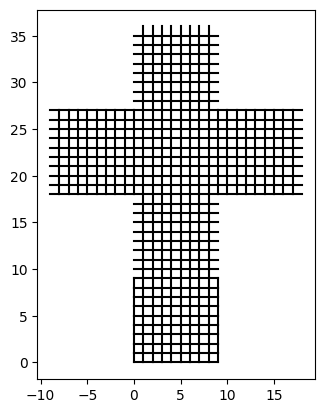

In [10]:
def draw_maze_cube(sideWalls):
    fig, ax = plt.subplots()
    for i, walls in enumerate(sideWalls):
        for row in walls:
            for wall in row:
                if not wall: continue
                if wall.is_removed: continue
                if(wall.face!=i): continue
                # if(not wall.is_vertical): continue
                start = wall.start
                end = wall.end
                ax.plot([start[1], end[1]], [height * 4 - start[0], height * 4- end[0]], color='black')
    ax.set_aspect('equal')
    # ax.axis('off')
    plt.show()
draw_maze_cube(sideWalls)

In [20]:
# startSide = random.randint(0, 5)
startSide = 2
startRow, startCol = random.randint(0, len(sideCells[startSide])-1), random.randint(0, len(sideCells[startSide][0])-1)
min_distances = {}
def dfs(cell, depth = 0):
    cell.is_visited = True
    shuffled_directions = list(directions)
    random.shuffle(shuffled_directions) 
    min_distance = min_distances.get(cell, sys.maxsize)
    min_distances[cell] = min(depth, min_distance)
    for direction in shuffled_directions:
        wall, next_cell = cell.get_direction(direction)
        # if next_cell: print(next_cell.position)
        if next_cell and not next_cell.is_visited:
            if next_cell.position == (6,5):
                print('Hello')
                print(wall)
            dfs(next_cell, depth+1)
            wall.is_removed = True

# print(startSide, startRow, startCol)
# print(sideCells[startSide])
dfs(sideCells[startSide][startRow][startCol])
# print(min_distances)
print(max(min_distances, key = min_distances.get).position)
# print(sideCells[startSide])
# print(sideCells[2][0][1].get_direction('up') == sideCells[0][-1][1].get_direction('bottom'))
# print(sideCells[2][0][1].get_direction('up'))
# print(sideCells[0][-1][1].get_direction('bottom'))
# print(sideCells[2][0][1] == sideCells[0][-1][1].bottom_cell)
# print(sideCells[0][-1][1].bottom_cell)

(3, 1)


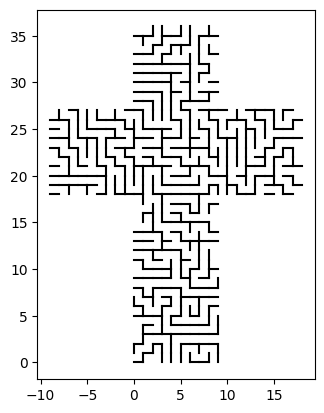

True
True


In [21]:
# sideWalls[2][0][1].is_removed = False
draw_maze_cube(sideWalls)
print(sideCells[0][0][0].left_cell == sideCells[1][0][0])
print(sideCells[1][0][0].up_cell == sideCells[0][0][0])

In [13]:
for side in sideCells:
    for row in side:
        for cell in row:
            print(cell.is_visited, end = " ")
        print()
    print()

True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 

True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 

True True True True True True True True True 
True True True True True True True True True 
True True True True True True True True True 
True True True True True True Tr

In [14]:
print(sideWalls)

[[[[false, 5], [true, 5], [true, 5], [true, 5], [true, 5], [true, 5], [false, 5], [false, 5], [true, 5]], [[true, 1], [true, 0], [false, 0], [false, 0], [true, 0], [false, 0], [false, 0], [true, 0], [false, 0], [true, 3]], [[false, 0], [false, 0], [true, 0], [false, 0], [false, 0], [true, 0], [true, 0], [false, 0], [false, 0]], [[true, 1], [false, 0], [true, 0], [false, 0], [true, 0], [true, 0], [false, 0], [false, 0], [true, 0], [false, 3]], [[true, 0], [true, 0], [false, 0], [true, 0], [false, 0], [false, 0], [true, 0], [true, 0], [true, 0]], [[false, 1], [true, 0], [false, 0], [true, 0], [false, 0], [false, 0], [true, 0], [false, 0], [false, 0], [true, 3]], [[false, 0], [false, 0], [true, 0], [false, 0], [true, 0], [true, 0], [true, 0], [true, 0], [false, 0]], [[true, 1], [true, 0], [true, 0], [false, 0], [true, 0], [true, 0], [false, 0], [false, 0], [true, 0], [false, 3]], [[false, 0], [false, 0], [false, 0], [false, 0], [false, 0], [false, 0], [true, 0], [false, 0], [true, 0]], [[

In [15]:
print(seed) 

4054811037228583204


In [16]:
sideWalls[5][len(sideWalls[5]) -2][len(sideWalls[5][len(sideWalls[5])-2])-1] == sideWalls[3][1][len(sideWalls[3][1])-1]

True